In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/marketing_data.csv


In [19]:
#load data set
data = pd.read_csv("../input/marketing-data/marketing_data.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [20]:
#clean up column names that contain whitespace
data.columns = data.columns.str.replace(' ', '',regex=True)
#data.info()

#trasform income column to a numerical
data['Income'] = data['Income'].str.replace('$', '',regex=True)
data['Income'] = data['Income'].str.replace(',','').astype('float')
#data.info()

In [21]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Exploratory Data Analysis

In [22]:
#identify null values 
data.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


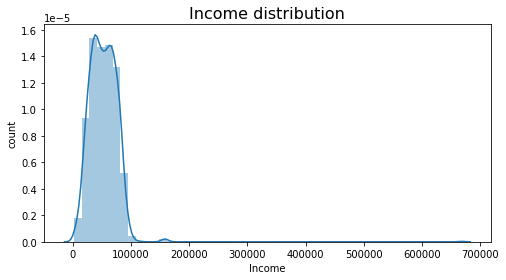

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(data['Income'], kde=True, hist=True)
plt.title('Income distribution', size=16)
plt.ylabel('count');


In [24]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:>

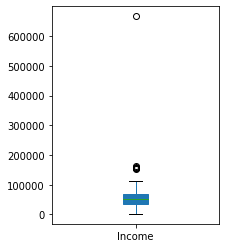

In [25]:
data['Income'].plot(kind='box', figsize=(3,4), patch_artist=True)

Indentify features container outliers
likely indicate data entry errors are Year_Birth <= 1900

In [26]:
#select columns to plot
data_to_plot = data.drop(columns = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

In [27]:
data_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


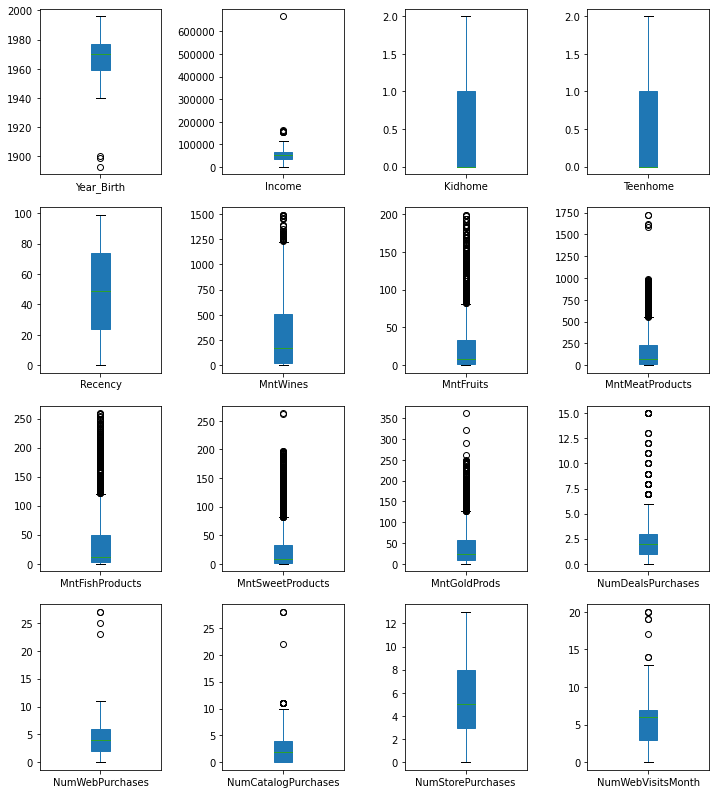

In [28]:
#subplots
data_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Remove rows where Year_Birth <= 1900:

<AxesSubplot:>

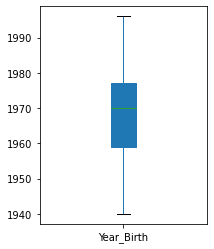

In [29]:
data = data[data['Year_Birth']>1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
data['Year_Birth'].plot(kind='box', patch_artist=True)

are there any variables that warrant transformations?

In [30]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


The Dt_Customer column should be transformed to datetime format

In [31]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

#data['Dt_Customer'].head()

In [32]:
list(data.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

manipulation feature
Review a list of the feature names below, from which we can engineer:
* The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'
* The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'
* The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'
* The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'
* The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [33]:
#Dependents
data['Dependents'] = data['Kidhome'] + data['Teenhome']

#Year becoming  a Customer
data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year

#Total amount spent
mnt_cols = [col for col in data.columns if 'Mnt' in col]

data['TotalMnt'] = data[mnt_cols].sum(axis=1)

#totoal Purchases
purchases_cols = [col for col in data.columns if  'Purchases' in col]
data['TotalPurchases'] = data[purchases_cols].sum(axis=1)

# Total Campaigns Accepted
campaigns_cols = [col for col in data.columns if 'Cmp' in col] + ['Response']
data['TotalCampaignsAcc'] = data[campaigns_cols].sum(axis=1)

# view new features, by customer ID
data[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc']].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.

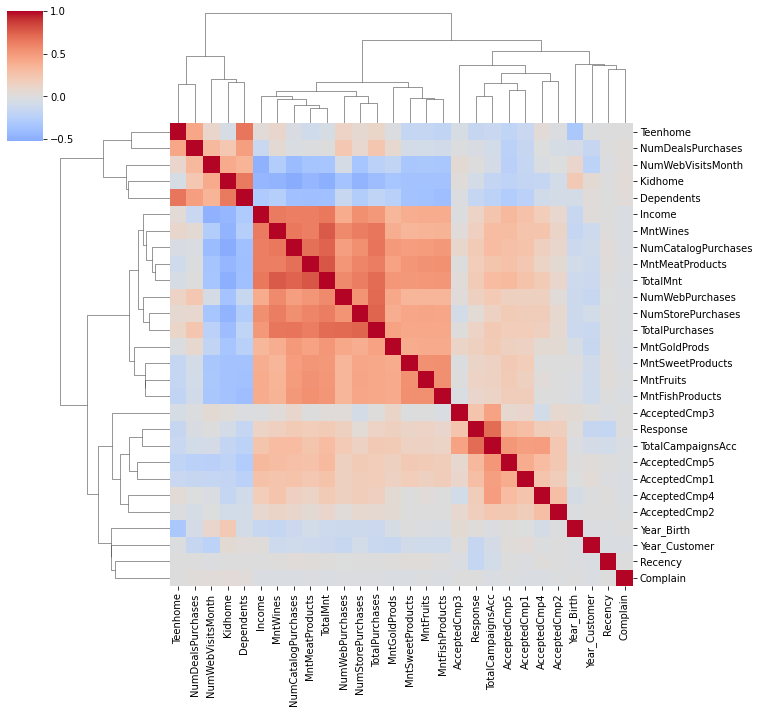

In [34]:
#calculation correlation matrix 
## using non-parametric test of correlation by using kendall method since feature are binary
corrs = data.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')

#plot clustered headmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

Plot illustrating the effect of high income on spending:
For the purposes of this plot, limiting income to < 200000 to remove outlier

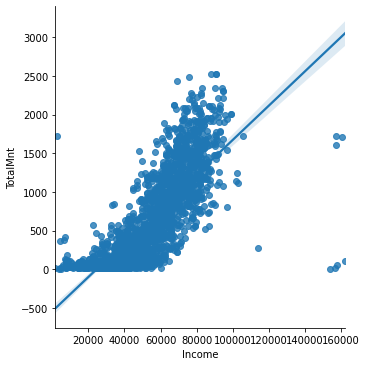

In [35]:
sns.lmplot(x='Income', y='TotalMnt', data=data[data['Income']<200000]);

Plot illustrating negative effect of having dependents (kids & teens) on spending:

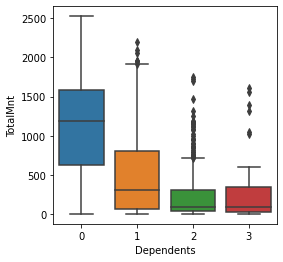

In [36]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=data);
#look there no correlation beatween them

Plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

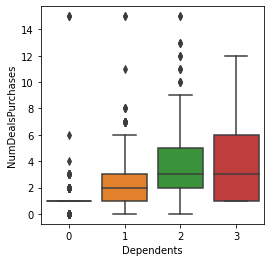

In [37]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=data);
#more dependents more number purchased

Plots illustrating the positive effect of income and negative effect of having kids & teens on advertising campaign acceptance:
For the purposes of the following plot, limiting income to < 200000 to remove outlier

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Income'>

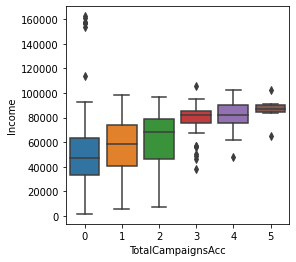

In [38]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data[data['Income'] < 200000])

<AxesSubplot:xlabel='TotalCampaignsAcc', ylabel='Dependents'>

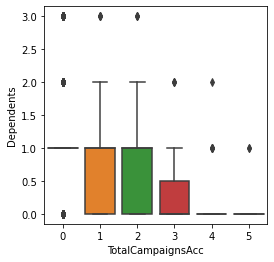

In [39]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TotalCampaignsAcc', y='Dependents', data=data)

Investigate anomaly:
Number of web visits in the last month is not positively correlated with number of web purchases
Instead, it is positively correlated with the number of deals purchased, suggesting that deals are an effective way of stimulating purchases on the website

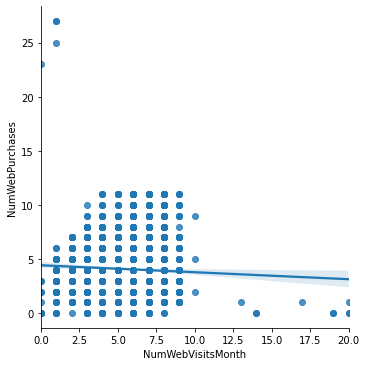

In [40]:
sns.lmplot(x='NumWebVisitsMonth',y='NumWebPurchases', data=data)

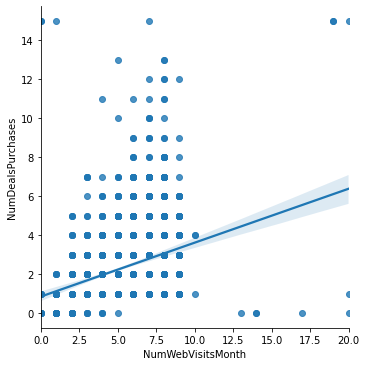

In [41]:
sns.lmplot(x='NumWebVisitsMonth',y='NumDealsPurchases',data=data)

# Section 02: Statistical Analysis
**What factors are significantly related to the number of store purchases?**

We will use use a linear regression model with NumStorePurchases as the target variable, and then use machine learning explainability techniques to get insights about which features predict the number of store purchases
Begin by plotting the target variable:

In [42]:
plt.figure(figsize=(8,3))
data['NumStorePurchases'].hist(bins=12,grid=False)');
plt.title('NumStorePurchases distribution', size=16)
plt.ylabel('count

SyntaxError: EOL while scanning string literal (<ipython-input-42-4afef30ecaf5>, line 2)

Drop uninformative features
    * ID is unique to each customer
    * Dt_Customer will be dropped in favor of using engineered         variable Year_Customer
Perform one-hot encoding of categorical features, encoded data shown below:

In [ ]:
# drop unique ID
data.drop(columns=['ID','Dt_Customer'], inplace=True)

In [ ]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = data.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = data.drop(columns=cat.columns)
data2 = pd.concat([cat_encoded, num], axis=1)
data2.head()

* Fit linear regression model to training data (70% of dataset)
* Evaluate predictions on test data (30% of dataset) using RMSE:
     * Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [ ]:
np.isnan(data2.any()) #and gets False


In [ ]:
np.all(np.isfinite(data2))

In [ ]:
np.any(np.isnan(data2))

In [ ]:
df2 = data2.apply (pd.to_numeric, errors='coerce')
df2 = data2.dropna()

print (df2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and y variables, and perform train-test split
X = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Identify features that significantly affect the number of store purchases, using permutation importance:
Significant features:
'TotalPurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'
All other features are not significant

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

Explore the directionality of these effects, using SHAP values:
* Findings:
    *     The number of store purchases increases with higher number of total purchases ('TotalPurchases')
    *     The number of store purchases decreases with higher number of catalog, web, or deals purchases ('NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases')
* Interpretation:
    Customers who shop the most in stores are those who shop less via the catalog, website, or special deals

In [ ]:
import shap

#calculate shap values
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

#plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5)

# Does US fare significantly better than the Rest of the World in terms of total purchases?
* Plot total number of purchases by country:
*     Findings:
        Spain (SP) has the highest number of purchases
        US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

In [ ]:
plt.figure(figsize=(5,4))
data.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases')

# Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
* Plot relationship between amount spent on gold in the last 2 years (MntGoldProds) and number of in store purchases (NumStorePurchases):
* Findings: There is a positive relationship, but is it statistically significant?

In [ ]:
sns.lmplot(x='MntGoldProds',y='NumStorePurchases', data = data);

Perform Kendall correlation analysis (non-parametric test since MntGoldProducts is not normally distributed and contains outliers):
* Findings: There is significant positive correlation between MntGoldProds and NumStorePurchases

In [ ]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=data['MntGoldProds'], y=data['NumStorePurchases'])

#print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value:', kendall_corr.pvalue)

# Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?
* We will compare MntFishProducts between Married PhD candidates and all other customers:
    Findings: Married PhD candidates spend significantly less on fish products compared to other customers.

In [ ]:
df2['Marital_Status_Married'].describe()

In [ ]:
# sum the marital status and phd dummy variables - the Married+PhD group will have value of 2
df2['Married_PhD'] = df2['Marital_Status_Married'] + df2['Education_PhD']
df2['Married_PhD'] = df2['Married_PhD'].replace({2:'Married-PhD', 1:'Other', 0:'Other'})

#plot MntFistProducts between Married-phD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts', data=df2);

In [ ]:
#independent t-test p-value
from scipy.stats import ttest_ind
pval = ttest_ind(df2[df2['Married_PhD'] == 'Married-PhD']['MntFishProducts'],  df2[df2['Married_PhD'] == 'Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval,3))

# What other factors are significantly related to amount spent on fish?
Like with the analysis of NumStorePurchases above, we will use use a linear regression model with MntFishProducts as the target variable, and then use machine learning explainability techniques to get insights about which features predict the amount spent on fish
Begin by plotting the target variable:

In [ ]:
plt.figure(figsize=(8,3))
#sns.distplot(data['MntFishProducts'], kde=False, hist=True, bins=12)
data['MntFishProducts'].hist(bins=12,grid=False)
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

Fit linear regression model to training data (70% of dataset)
Evaluate predictions on test data (30% of dataset) using RMSE:
*     Findings: The RMSE is exceedingly small compared to the median value of the target variable, indicating good model predictions

In [ ]:
df2.info()

In [ ]:
# isolate X and y variables, and perform train-test split
X = df2.drop(columns=['MntFishProducts','Married_PhD'])
y = df2['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

* Identify features that significantly affect the amount spent on fish, using permutation importance:
* Significant features:
    'TotalMnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'
    All other features are not significant

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

* Explore the directionality of these effects, using SHAP values:
* Findings:
The amount spent on fish increases with higher total amount spent ('TotalMnt')
The amount spent on fish decreases with higher amounts spent on wine, meat, gold, fruit, or sweets ('MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits')
* Interpretation:
Customers who spend the most on fish are those who spend less on other products (wine, meat, gold, fruit, and sweets)

In [ ]:
import shap

#calculate shap value
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

#plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7)

Statistical summary of regional effects on campaign success:

    * Methodology: Performed logistic regression for Campaign Accepted by Country, reporting Chisq p-value for overall model.
    
    * Findings: The regional differences in advertising campaign success are statistically significant.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

## get the data of interest for glm
df_cam_wide = data[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

## to store statistics results
stat_results = []

## perform glm
for col in df_cam_wide.drop(columns='Country').columns:
    this_data = df_cam_wide[['Country', col]]
    
     # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula = formula, data=this_data, family=sm.genmod.families.Binomial())
    result = model.fit()
    
        # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq , 7) # Df Model = 7 degrees of freedom when you run result.summary()
     
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())
    
## check results
print("\nChisq p-values: ", stat_results)

# # Section 03: Data Visualization
Which marketing campaign is most successful?¶

* Plot marketing campaign overall acceptance rates:

* Findings: The most successful campaign is the most recent (column name: Response)

In [ ]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 
                               'Response']].mean()*100,
                           columns=['Percent']).reset_index()
                           
#plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette = 'Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

# What does the average customer look like for this company?
Basic demographics: The average customer is...
*     Born in 1969
*     Became a customer in 2013
*     Has an income of roughly $52,000 per year
*     Has 1 dependent (roughly equally split between kids or teens)
*     Made a purchase from our company in the last 49 days

In [ ]:
# list of cols with binary responses
binary_cols = [col for col in data.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in data.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in data.columns if 'Num' in col] + ['TotalPurchases', 'TotalCampaignsAcc']

In [ ]:
# average customer demographics
demographics = pd.DataFrame(round(data.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex([
    'Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

# Which products are performing best?
The average customer spent...

* $25-50 on Fruits, Sweets, Fish, or Gold products
* Over $160 on Meat products
* Over $300 on Wines
* Over $600 total

Products performing best:

* Wines
* Followed by meats

In [ ]:
spending = pd.DataFrame(round(data[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

## add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,
           y=p.get_y()+0.5,
            s=q,
            ha="center");

In [ ]:
channels = pd.DataFrame(round(data[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')

## add text labels for each bar's value
for p,q in zip(ax.patches, channels['Average']):
    ax.text(x=q+0.8,
            y=p.get_y()+0.5,
            s=q,
            ha="center") ;